Text(0, 0.5, 'Current(mA)')

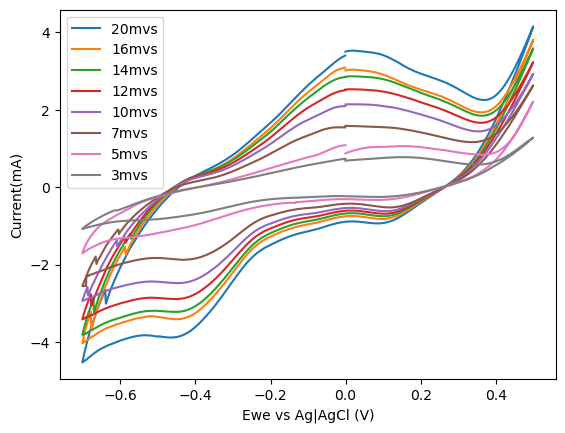

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_file(file_path):
    # Read the data from the file
    data = np.loadtxt(file_path)
    
    # Split the data into two columns
    column1 = data[:, 0]
    column2 = data[:, 1]
    column3 = data[:, 2]
    
    return column1, column2, column3

# Example usage:
file1 = 'Cu2O/20mvs.csv'  
column1, column2, column3 = read_data_from_file(file1)
file2= 'Cu2O/16mvs.csv'  
column4, column5, column6 = read_data_from_file(file2)
file3 = 'Cu2O/14mvs.csv'  
column7, column8, column9 = read_data_from_file(file3)
file4 = 'Cu2O/12mvs.csv'  
column10, column11, column12 = read_data_from_file(file4)
file5 = 'Cu2O/10mvs.csv'  
column13, column14, column15 = read_data_from_file(file5)
file6 = 'Cu2O/7mvs.csv'  
column16, column17, column18 = read_data_from_file(file6)
file7 = 'Cu2O/5mvs.csv'  
column19, column20, column21 = read_data_from_file(file7)
file8 = 'Cu2O/3mvs.csv'  
column22, column23, column24 = read_data_from_file(file8)

plt.plot(column1,column2)
plt.plot(column4,column5)
plt.plot(column7,column8)
plt.plot(column10,column11)
plt.plot(column13,column14)
plt.plot(column16,column17)
plt.plot(column19,column20)
plt.plot(column22,column23)
plt.legend(['20mvs', '16mvs', '14mvs', '12mvs', '10mvs', '7mvs', '5mvs', '3mvs'])
plt.xlabel('Ewe vs Ag|AgCl (V)')
plt.ylabel('Current(mA)')

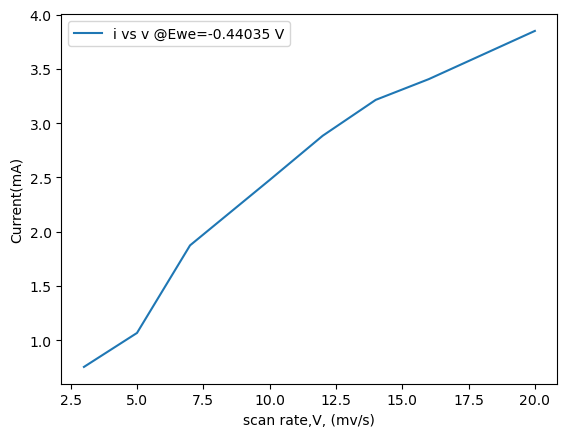

In [146]:
target =-0.44035
index = min(range(len(column1)), key=lambda i: abs(column1[i] - target))

i1=column2[index]
i2=column5[index]
i3=column8[index]
i4=column11[index]
i5=column14[index]
i6=column17[index]
i7=column20[index]
i8=column23[index]

t=[column3[index],column6[index],column9[index],column12[index],column15[index],column18[index],column21[index],column24[index]]

x = [20,16,14,12,10,7,5,3]
y=[-i1,-i2,-i3,-i4,-i5,-i6,-i7,-i8]
plt.plot(x,y)
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')
plt.legend([f"i vs v @Ewe={target} V"])

TS-PG Method @E=-0.44035 V:
Fitted parameters:
a = 0.3004   b = 0.1377   c = 0.0000000000000193895
R-squared: 0.9683
------------------------------------------------------------------------------------

Current Distributions(@20mv/s):
 faradaic(mA) = 1.343354     capacitive(mA) = 2.753427   pseudocapacitive(mA) = 0.000000
Charge Distributions(@20mv/s):
 faradaic(mAs) = 96.694757   capacitive(mAs) = 198.191920  pseudocapacitive(mAs) = 0.000000
 faradaic = 32.790480%       capacitive = 67.209520%     pseudocapacitive = 0.000000%
------------------------------------------------------------------------------------

Current Distributions(@16mv/s):
 faradaic(mA) = 1.201532     capacitive(mA) = 2.202741   pseudocapacitive(mA) = 0.000000
Charge Distributions(@16mv/s):
 faradaic(mAs) = 108.055128   capacitive(mAs) = 198.094944  pseudocapacitive(mAs) = 0.000000
 faradaic = 35.294824%       capacitive = 64.705176%     pseudocapacitive = 0.000000%
--------------------------------------------------

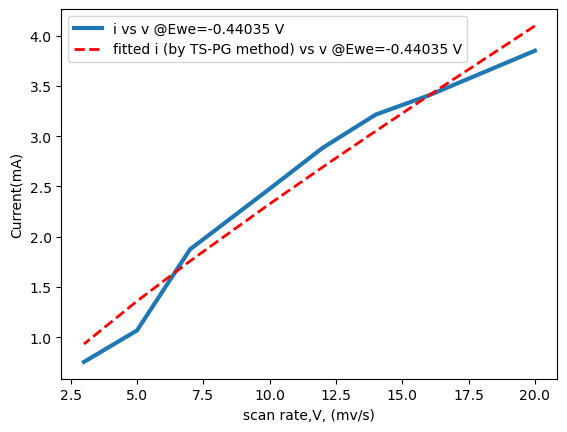

In [147]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b, c):
    return a * np.sqrt(x) + b * x + c * x**1.5

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b, c = params
print(f"TS-PG Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}   c = {c:.19f}")

y1=model(x[0],a,b,c)
y2=model(x[1],a,b,c)
y3=model(x[2],a,b,c)
y4=model(x[3],a,b,c)
y5=model(x[4],a,b,c)
y6=model(x[5],a,b,c)
y7=model(x[6],a,b,c)
y8=model(x[7],a,b,c)

ymodel=[y1,y2,y3,y4,y5,y6,y7,y8]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by TS-PG method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 84)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    ipseudo = c * x[i]**1.5
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qpseudo = ipseudo * t[i]
    qtotal = qfara + qcapa + qpseudo

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    percentp = qpseudo / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.6f}     capacitive(mA) = {icapa:.6f}   pseudocapacitive(mA) = {ipseudo:.6f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.6f}   capacitive(mAs) = {qcapa:.6f}  pseudocapacitive(mAs) = {qpseudo:.6f}")
    print(f" faradaic = {percentf:.6f}%       capacitive = {percentc:.6f}%     pseudocapacitive = {percentp:.6f}%")
    print('-' * 84)

Dunn Method @E=-0.44035 V:
Fitted parameters:
a = 0.3004   b = 0.1377
R-squared: 0.9683
------------------------------------------------------------

Current Distributions(@20mv/s):
 faradaic(mA) = 1.343354     (pseudo)capacitive(mA) = 2.753427
Charge Distributions(@20mv/s):
 faradaic(mAs) = 96.694758   (pseudo)capacitive(mAs) = 198.191919
 faradaic = 32.790480%       (pseudo)capacitive = 67.209520%
------------------------------------------------------------

Current Distributions(@16mv/s):
 faradaic(mA) = 1.201532     (pseudo)capacitive(mA) = 2.202741
Charge Distributions(@16mv/s):
 faradaic(mAs) = 108.055129   (pseudo)capacitive(mAs) = 198.094943
 faradaic = 35.294824%       (pseudo)capacitive = 64.705176%
------------------------------------------------------------

Current Distributions(@14mv/s):
 faradaic(mA) = 1.123931     (pseudo)capacitive(mA) = 1.927399
Charge Distributions(@14mv/s):
 faradaic(mAs) = 115.515791   (pseudo)capacitive(mAs) = 198.094943
 faradaic = 36.834132%    

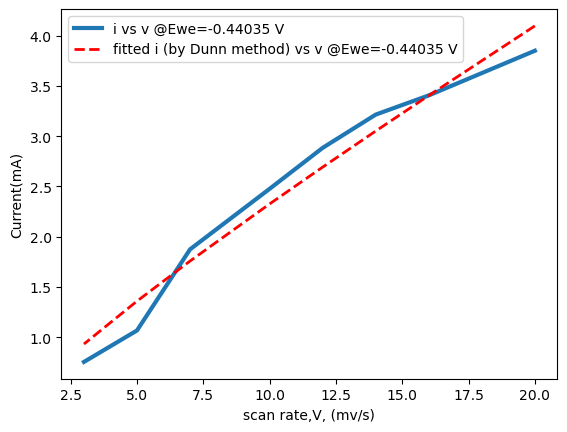

In [148]:
#dunn_method
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the model function
def model(x, a, b):
    return a * np.sqrt(x) + b * x

# Perform curve fitting with non-negative constraints
params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

# Extract the parameters
a, b= params
print(f"Dunn Method @E={target} V:\nFitted parameters:\na = {a:.4f}   b = {b:.4f}")

y1=model(x[0],a,b)
y2=model(x[1],a,b)
y3=model(x[2],a,b)
y4=model(x[3],a,b)
y5=model(x[4],a,b)
y6=model(x[5],a,b)
y7=model(x[6],a,b)
y8=model(x[7],a,b)

ymodel=[y1,y2,y3,y4,y5,y6,y7,y8]

# Plotting the first line (solid)
plt.plot(x, y,linewidth=3, label=f"i vs v @Ewe={target} V")

# Plotting the second line (dashed and tiny)
plt.plot(x, ymodel, linestyle='--', linewidth=2,color='r', label=f"fitted i (by Dunn method) vs v @Ewe={target} V")

# Adding the legend
plt.legend()
plt.xlabel('scan rate,V, (mv/s)')
plt.ylabel('Current(mA)')

# Calculate R-squared using sklearn
r_squared = r2_score(y,ymodel)

print(f"R-squared: {r_squared:.4f}")
print('-' * 60)

for i in range(len(x)):
    ifara = a * np.sqrt(x[i])
    icapa = b * x[i]
    
    qfara = ifara * t[i]
    qcapa = icapa * t[i]
    qtotal = qfara + qcapa

    percentf = qfara / qtotal * 100
    percentc = qcapa / qtotal * 100
    print(f"\nCurrent Distributions(@{x[i]}mv/s):\n faradaic(mA) = {ifara:.6f}     (pseudo)capacitive(mA) = {icapa:.6f}")
    print(f"Charge Distributions(@{x[i]}mv/s):\n faradaic(mAs) = {qfara:.6f}   (pseudo)capacitive(mAs) = {qcapa:.6f}")
    print(f" faradaic = {percentf:.6f}%       (pseudo)capacitive = {percentc:.6f}%")
    print('-' * 60)